<a href="https://colab.research.google.com/github/ingrid-revitti/DS/blob/main/CP2_modelo_predicao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler


Trata-se de dados de efeitos de **campanhas de marketing e
engajamento.**  A coluna responses é o alvo. Procura-se entender se
pode-se prever o engajamento do cliente em uma campanha,
baseado nas outras features.


1) Leia o arquivo marketing_results.csv. (UTF-8)


2) Faça todas as opções para cleaning e EDA.


3) Aplique os dados para treinar e avaliar um modelo de predição.


In [ ]:
df_marketing = pd.read_csv('marketing_results.csv', encoding='UTF-8')

In [ ]:
df_marketing

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [ ]:
df_marketing.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [ ]:
# df_marketing['Dt_Customer'] = df_marketing['Dt_Customer'].astype('datetime64[ns]') erramo

In [ ]:
# df_marketing = df_marketing.drop_duplicates()

In [ ]:
df_marketing['Income'].fillna(52247.2, inplace=True)

In [ ]:
df_marketing['Income'].mean()

52247.25080357143

In [ ]:
df_com_nan = df_marketing.isnull().any()


In [ ]:
df_com_nan

Id                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
Response               False
Complain               False
dtype: bool

In [ ]:
df_marketing['Response'].unique()

array([1, 0])

In [ ]:
# df_marketing['Response'] = df_marketing['Response'].astype('bool')

In [ ]:
df_marketing_alt = df_marketing

In [ ]:
# Criar instâncias do LabelEncoder
le_education = LabelEncoder()
le_marital_status = LabelEncoder()

# Transformar as variáveis categóricas
df_marketing_alt['Education'] = le_education.fit_transform(df_marketing_alt['Education'])
df_marketing_alt['Marital_Status'] = le_marital_status.fit_transform(df_marketing_alt['Marital_Status'])


In [ ]:
df_marketing_alt.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [ ]:
df_marketing_alt = df_marketing_alt.drop('Id', axis=1)

In [ ]:
df_marketing_alt['Dt_Customer'] = pd.to_datetime(df_marketing_alt['Dt_Customer'], format='%m/%d/%Y')

In [ ]:
df_marketing['Dt_Customer'] = pd.to_datetime(df_marketing['Dt_Customer'], format='%m/%d/%Y')

In [ ]:
max_date = df_marketing_alt['Dt_Customer'].max()

In [ ]:
max_date2 = df_marketing['Dt_Customer'].max()

In [ ]:
df_marketing_alt['Customer_Days'] = np.vectorize(lambda x: (max_date - x).days)(df_marketing_alt['Dt_Customer'])

In [ ]:
df_marketing['Customer_Days'] = np.vectorize(lambda x: (max_date2 - x).days)(df_marketing['Dt_Customer'])

In [ ]:
df_marketing_alt = df_marketing_alt.drop('Dt_Customer', axis = 1)

In [ ]:
df_marketing = df_marketing.drop('Dt_Customer', axis = 1)

In [ ]:
# df_marketing['Customer_Days'] = (pd.Timestamp.now() - df_marketing['Dt_Customer']).dt.days

In [ ]:
df_marketing = df_marketing.drop('Id', axis = 1)
df_marketing

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Days
0,1970,2,2,84835.0,0,0,0,189,104,379,...,189,218,1,4,4,6,1,1,0,173
1,1961,2,4,57091.0,0,0,0,464,5,64,...,0,37,1,7,3,7,5,1,0,174
2,1958,2,3,67267.0,0,1,0,134,11,59,...,2,30,1,3,2,5,2,0,0,207
3,1967,2,5,32474.0,1,1,0,10,0,1,...,0,0,1,1,0,2,7,0,0,31
4,1989,2,4,21474.0,1,0,0,6,16,24,...,0,34,2,3,1,2,7,1,0,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,4,2,66476.0,0,1,99,372,18,126,...,48,78,2,5,2,11,4,0,0,521
2236,1977,0,3,31056.0,1,0,99,5,10,13,...,8,16,1,1,0,3,8,0,0,683
2237,1976,2,2,46310.0,1,0,99,185,2,88,...,5,14,2,6,1,5,8,0,0,999
2238,1978,2,3,65819.0,0,0,99,267,38,701,...,165,63,1,5,4,10,3,0,0,737


In [ ]:
df_marketing.describe()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Days
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,2.393750,3.729911,52247.250804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,...,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375,512.043304
std,11.984069,1.124797,1.076277,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,...,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391,232.229893
min,1893.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,2.000000,3.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,...,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,340.750000
50%,1970.000000,2.000000,4.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,...,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,513.000000
75%,1977.000000,3.000000,5.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,...,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,685.250000
max,1996.000000,4.000000,7.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,...,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1063.000000


In [ ]:
df_marketing_alt['Age'] = 2014 - df_marketing_alt['Year_Birth']


In [ ]:
df_marketing['Age'] = df_marketing_alt['Age']

In [ ]:
df_marketing_alt = df_marketing_alt.drop('Year_Birth', axis = 1)


In [ ]:
df_marketing_alt.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Days,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.393750,3.729911,52247.250804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375,512.043304,45.194196
std,1.124797,1.076277,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391,232.229893,11.984069
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,2.000000,3.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,340.750000,37.000000
50%,2.000000,4.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,513.000000,44.000000
75%,3.000000,5.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,685.250000,55.000000
max,4.000000,7.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1063.000000,121.000000


In [ ]:
df_marketing_alt.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain',
       'Customer_Days', 'Age'],
      dtype='object')

In [ ]:
# Criar a instância do StandardScaler
scaler = StandardScaler()

# Selecionar as variáveis numéricas para normalização (incluindo as codificadas)
numeric_features = ['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain',
       'Customer_Days', 'Age']

# Normalizar as variáveis numéricas
df_marketing_alt[numeric_features] = scaler.fit_transform(df_marketing_alt[numeric_features])


In [ ]:
df_marketing_alt['Response'].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

In [ ]:
#sns.set(style = 'ticks')
#sns.pairplot(df_marketing, palette= ('r','b'), hue = 'Response')
#plt.show()

In [ ]:
df_marketing.sort_values(by='Income', ascending = True)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Days,Age
1466,1971,2,2,1730.0,0,0,65,1,1,3,...,1,15,0,0,0,20,0,0,202,43
961,1979,2,3,2447.0,1,0,42,1,1,1725,...,1,15,0,28,0,1,0,0,553,35
1291,1973,2,4,3502.0,1,0,56,2,1,1,...,1,0,0,0,0,14,0,0,602,41
663,1963,4,3,4023.0,1,1,29,5,0,1,...,1,15,0,0,0,19,0,0,166,51
14,1969,2,3,4428.0,0,1,0,16,4,12,...,321,0,25,0,0,1,0,0,575,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,1973,4,3,157243.0,0,1,98,20,2,1582,...,1,15,0,22,0,0,0,0,337,41
853,1971,3,5,157733.0,1,0,37,39,1,9,...,8,0,1,0,1,1,0,0,609,43
497,1982,4,3,160803.0,0,0,21,55,16,1622,...,4,15,0,28,1,0,0,0,972,32
731,1976,4,5,162397.0,1,1,31,85,1,16,...,2,0,0,0,1,1,0,0,640,38


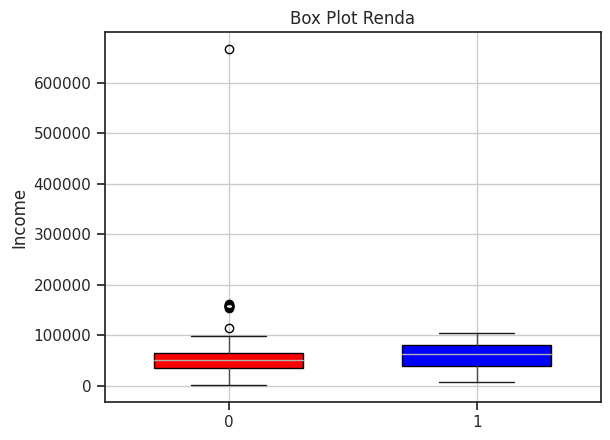

In [ ]:
fig, ax = plt.subplots()

df_marketing[df_marketing['Response'] == 0].boxplot(column='Income', ax=ax, positions=[0], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'))

df_marketing[df_marketing['Response'] == 1].boxplot(column='Income', ax=ax, positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'))

ax.set_xticks([0, 1])
ax.set_xticklabels([0, 1])
ax.set_ylabel('Income')
ax.set_title('Box Plot Renda')

plt.show()

In [ ]:
#df_marketing['Response'] = df_marketing['Response'].astype('int64')

In [ ]:
print(df_marketing.describe())

        Year_Birth    Education  Marital_Status         Income      Kidhome  \
count  2240.000000  2240.000000     2240.000000    2240.000000  2240.000000   
mean   1968.805804     2.393750        3.729911   52247.250804     0.444196   
std      11.984069     1.124797        1.076277   25037.797168     0.538398   
min    1893.000000     0.000000        0.000000    1730.000000     0.000000   
25%    1959.000000     2.000000        3.000000   35538.750000     0.000000   
50%    1970.000000     2.000000        4.000000   51741.500000     0.000000   
75%    1977.000000     3.000000        5.000000   68289.750000     1.000000   
max    1996.000000     4.000000        7.000000  666666.000000     2.000000   

          Teenhome      Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000  2240.000000      2240.000000   
mean      0.506250    49.109375   303.935714    26.302232       166.950000   
std       0.544538    28.962453   336.597393    39.773

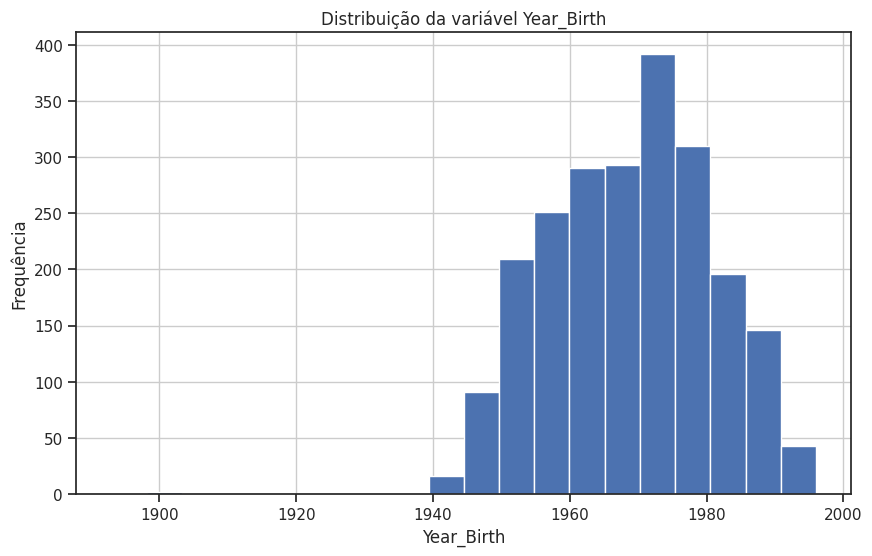

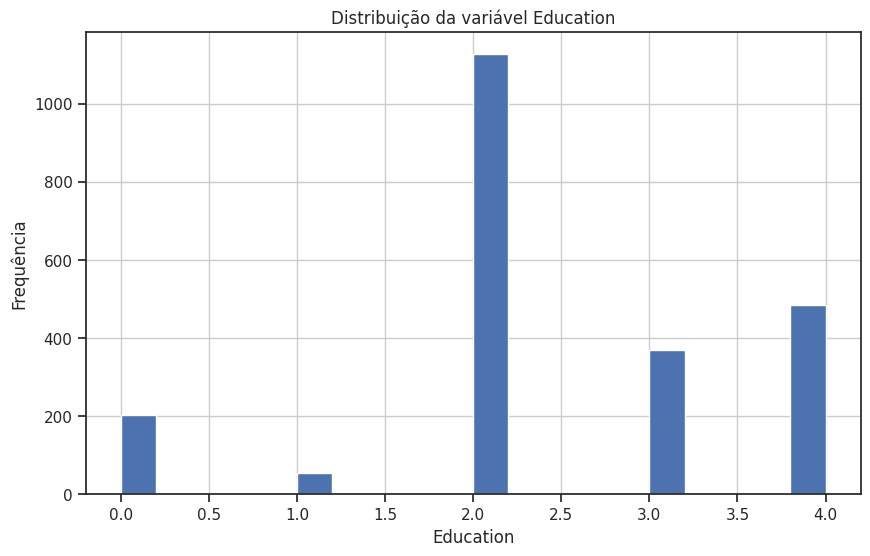

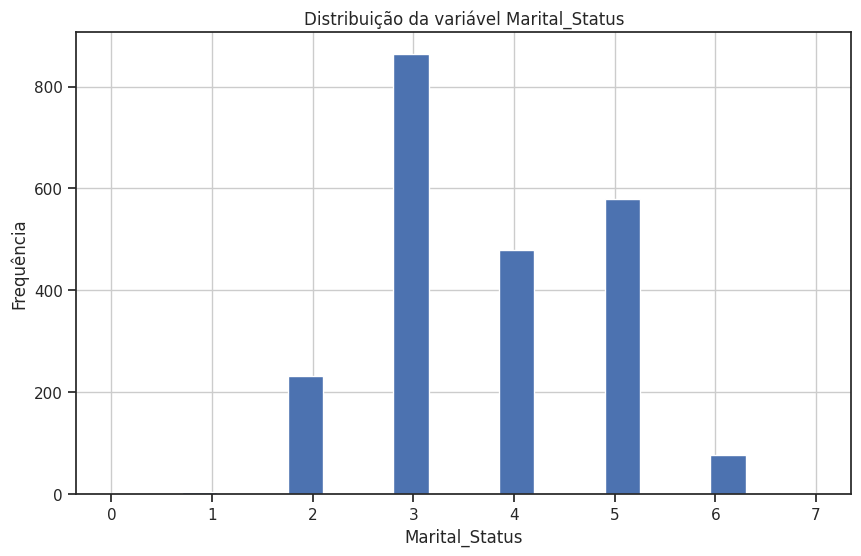

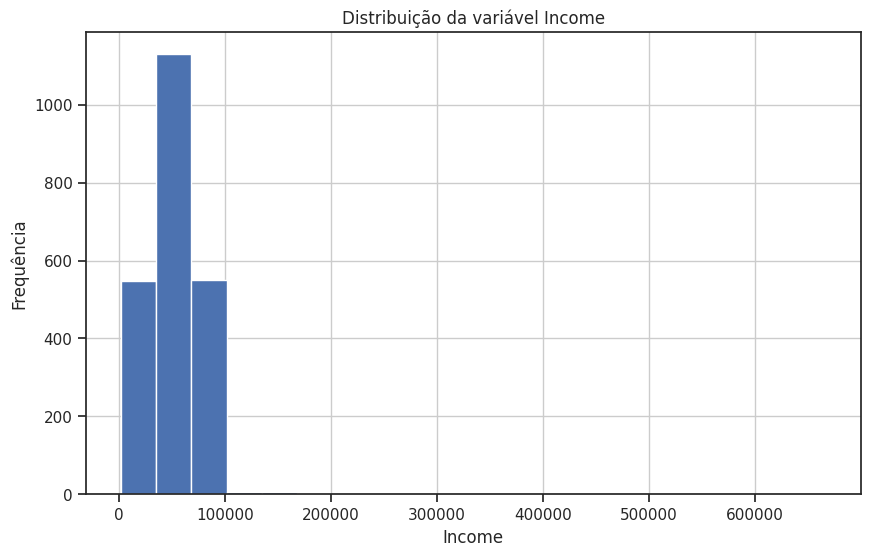

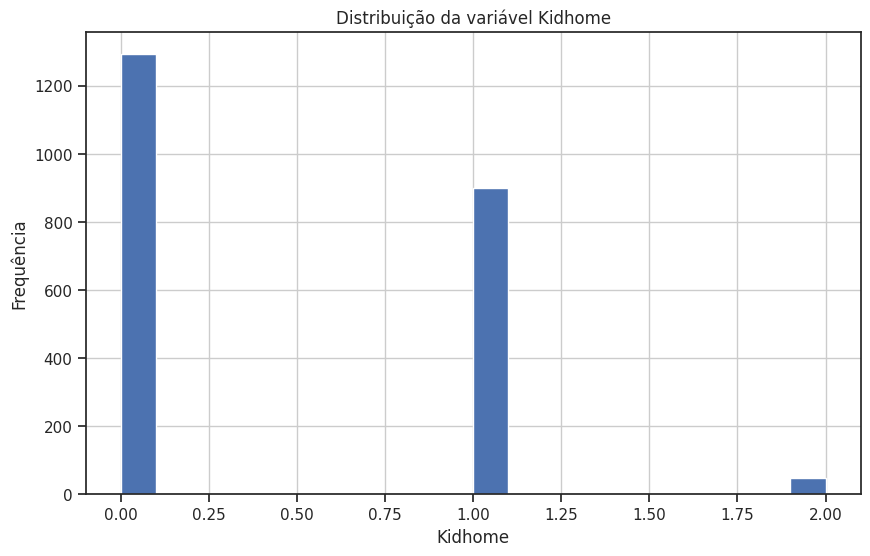

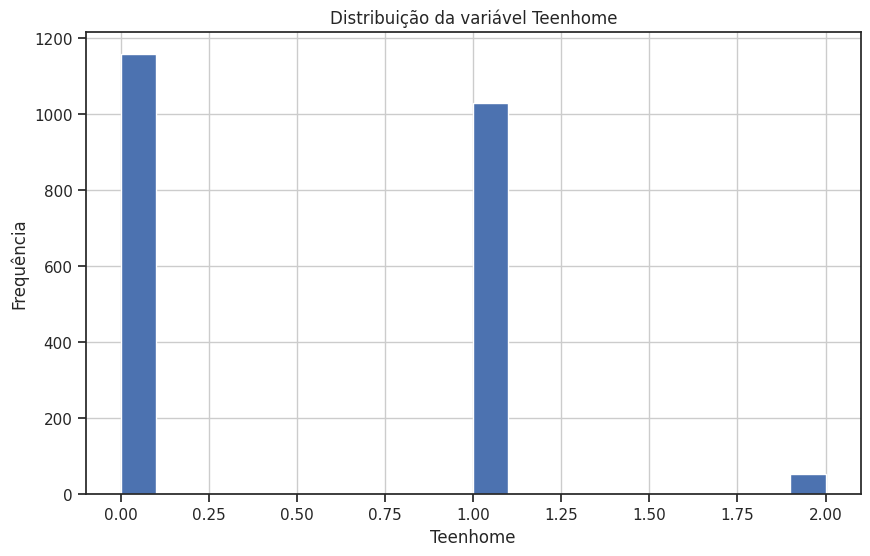

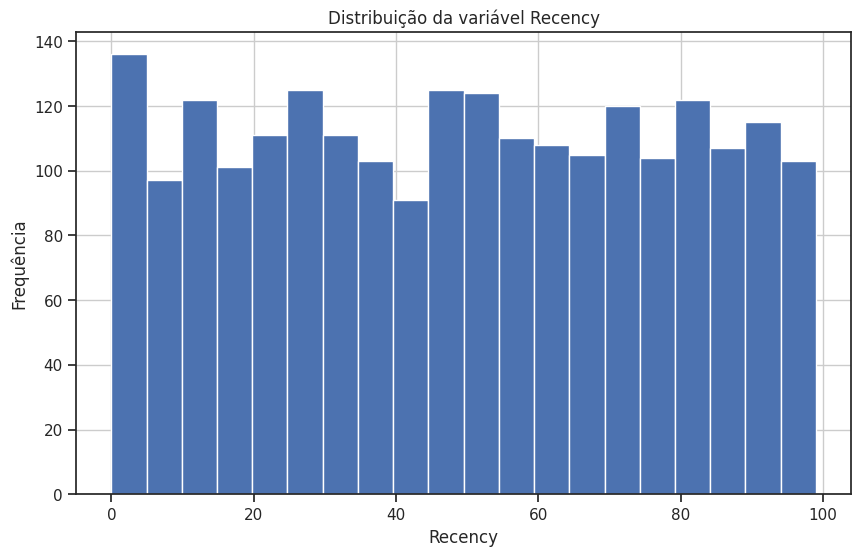

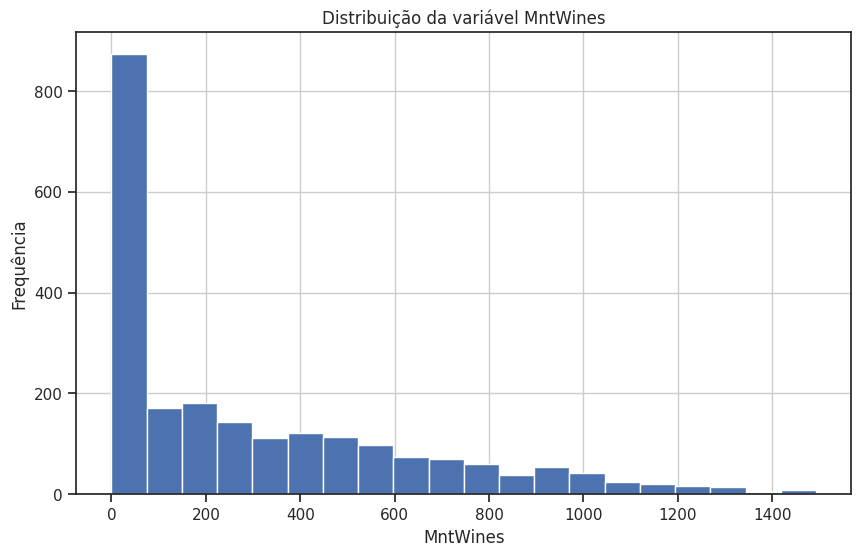

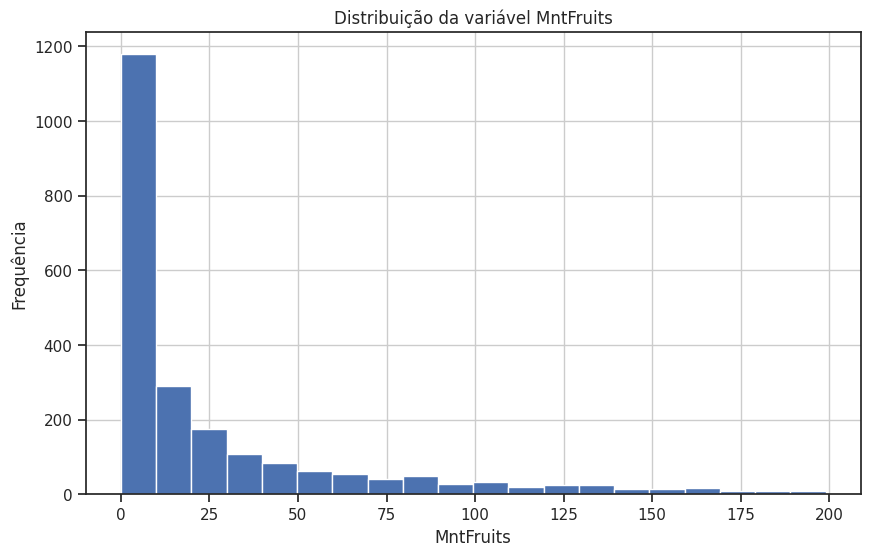

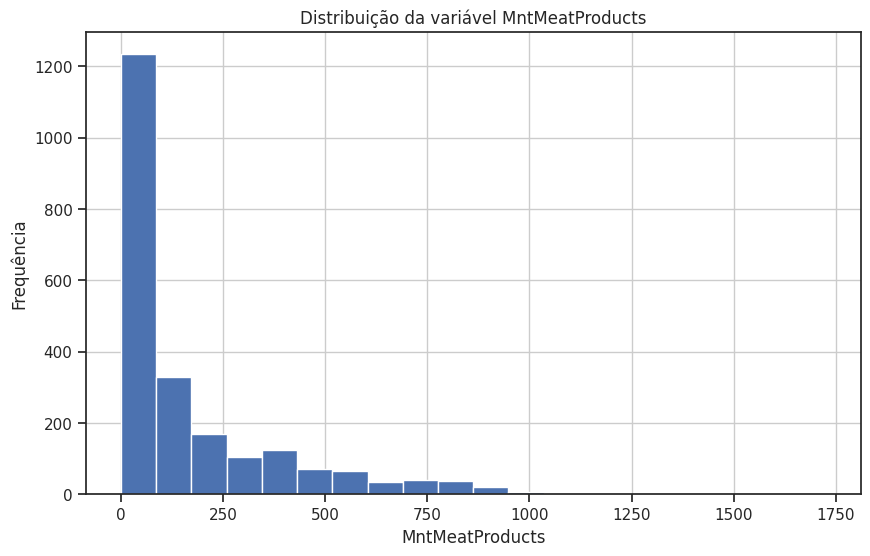

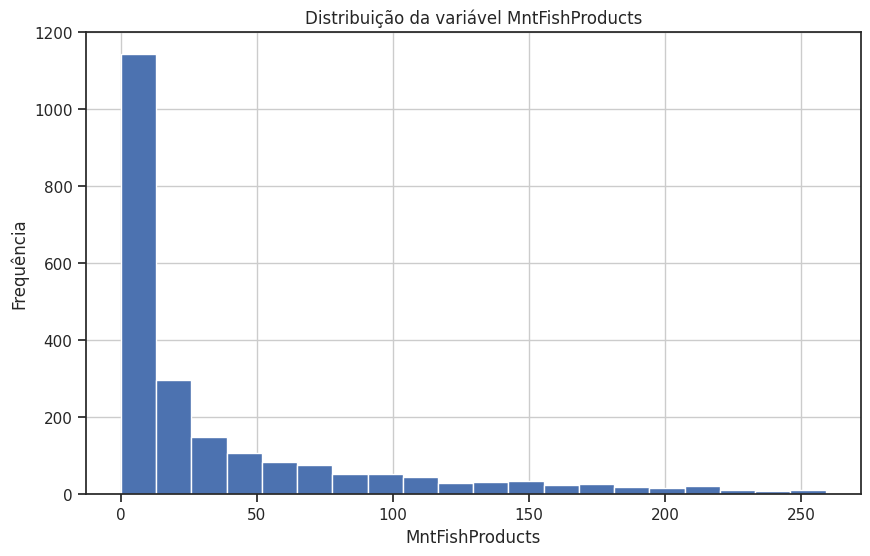

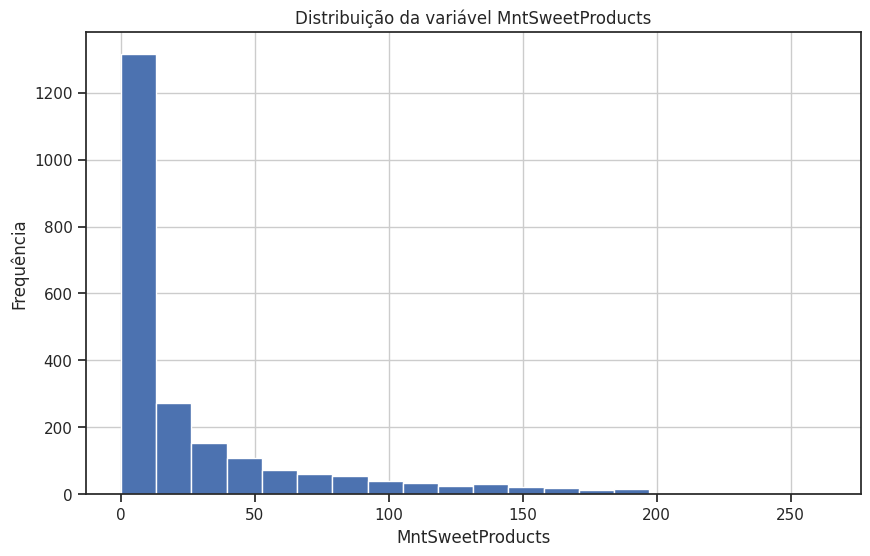

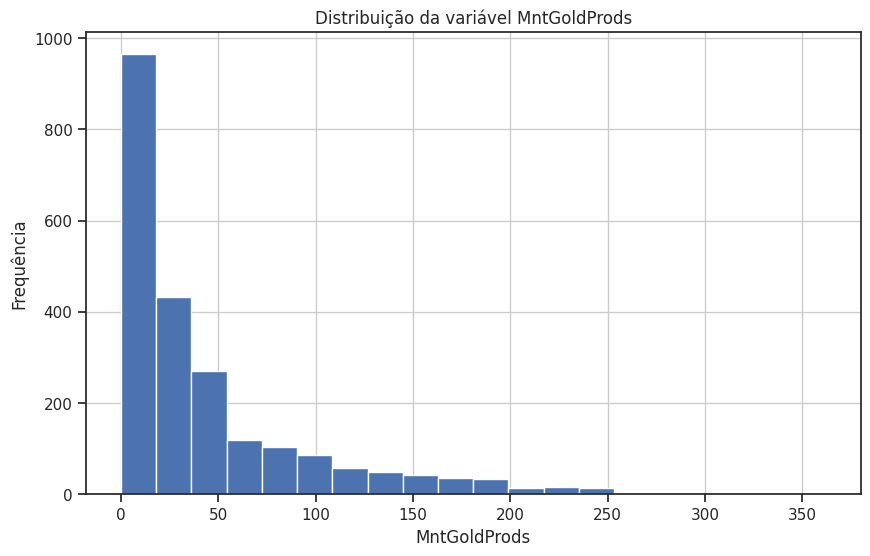

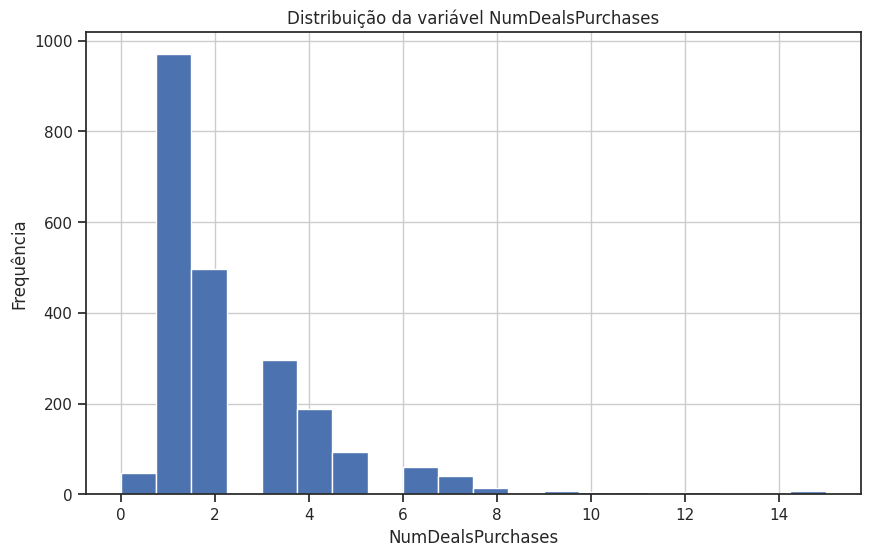

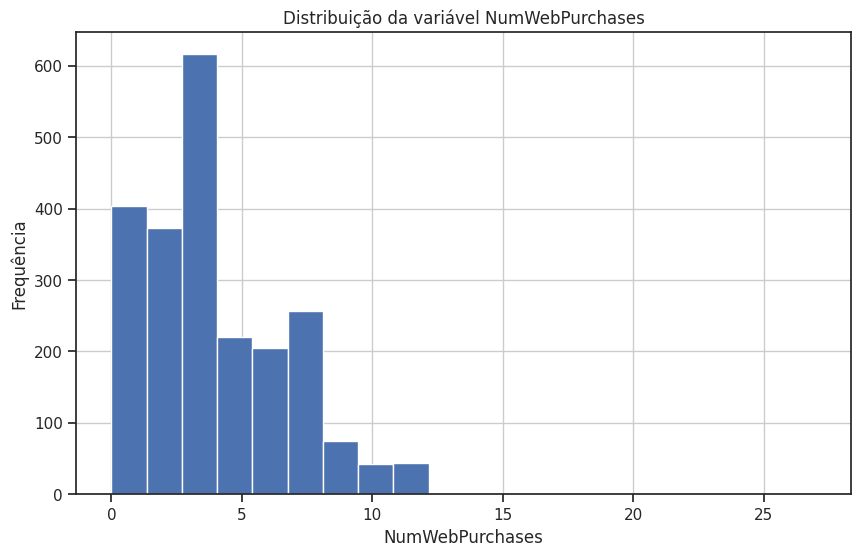

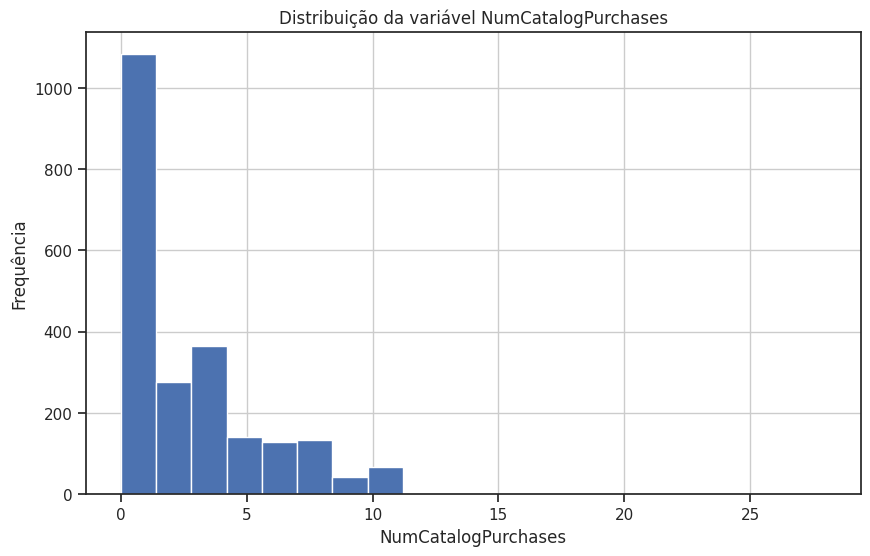

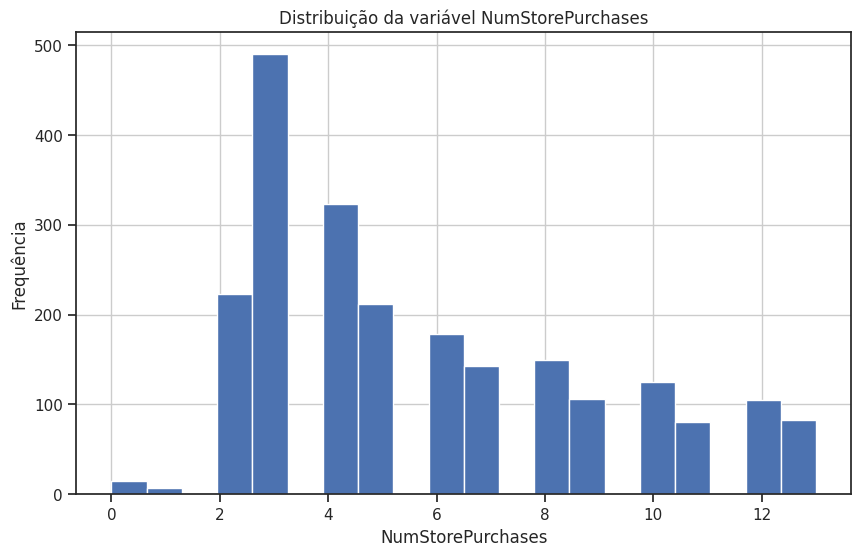

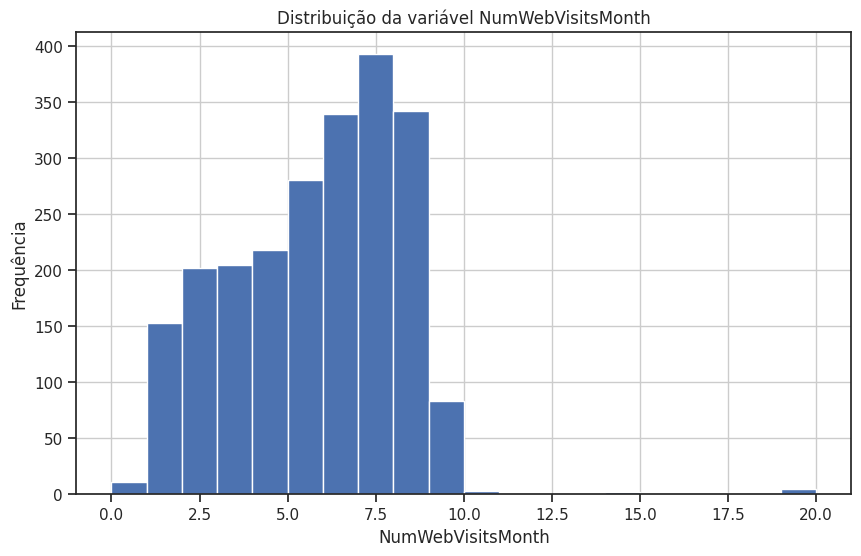

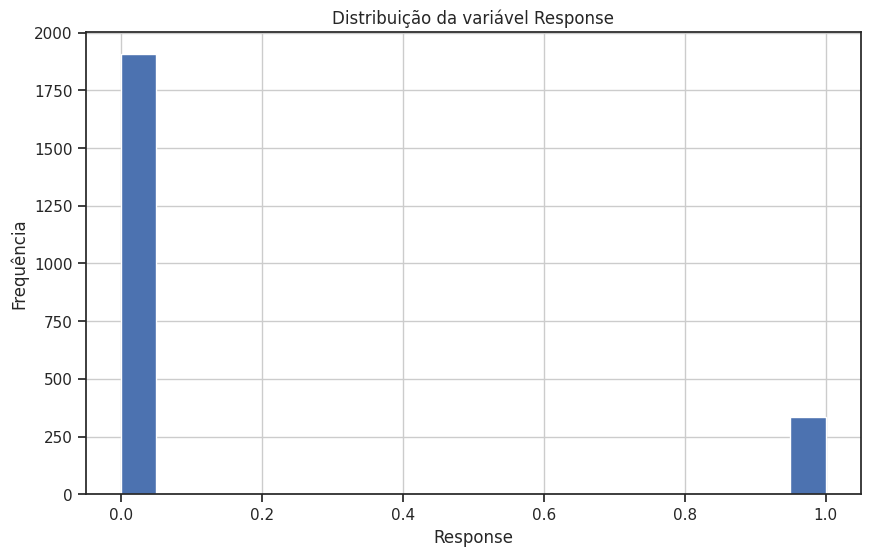

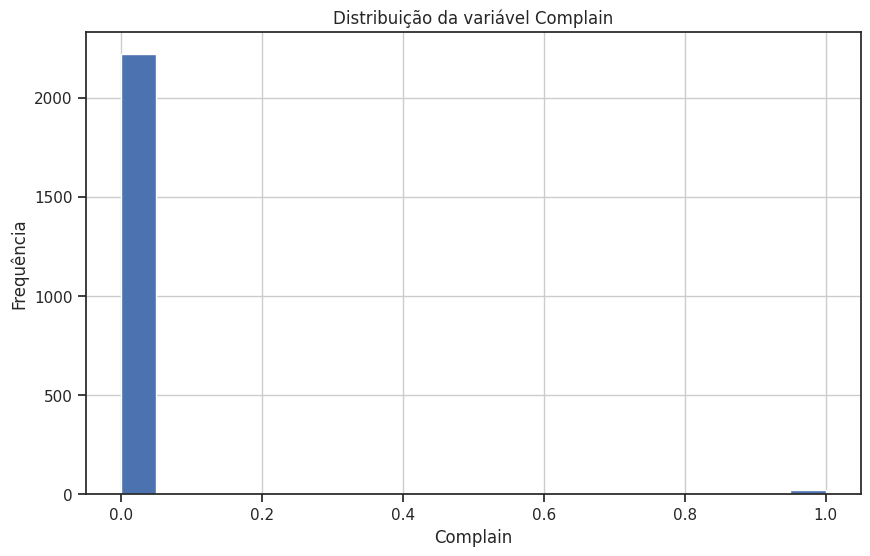

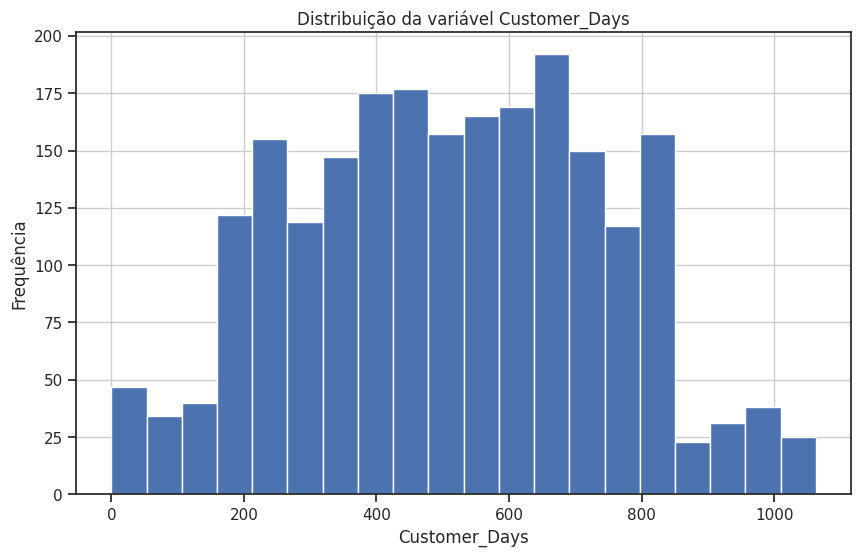

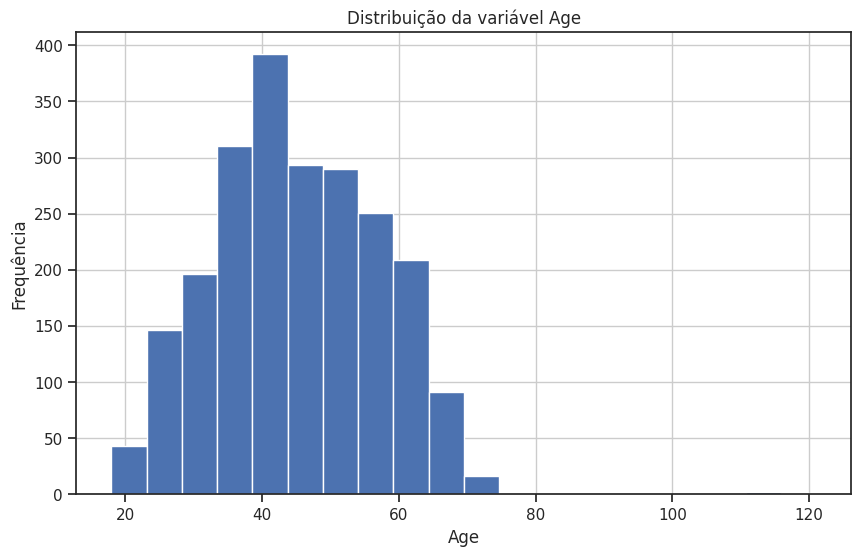

In [ ]:

for col in df_marketing.select_dtypes(include=[float, int]):
    plt.figure(figsize=(10, 6))
    plt.hist(df_marketing[col], bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.title(f'Distribuição da variável {col}')
    plt.grid()
    plt.show()


In [ ]:
data = df_marketing[df_marketing.Response == 0].Income
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

IQR = Q3 - Q1

fator = 1.5

whisker_inferior = Q1 - fator * IQR
whisker_superior = Q3 + fator * IQR

print("Whisker Inferior:", whisker_inferior)
print("Whisker Superior:", whisker_superior)



Whisker Inferior: -12506.25
Whisker Superior: 113003.75


In [ ]:
df_marketing.loc[df_marketing[df_marketing.Income>whisker_superior].index,['Income']]

,Income
210,113734.0
325,157146.0
497,160803.0
527,666666.0
731,162397.0
853,157733.0
1826,153924.0
1925,156924.0
2204,157243.0


In [ ]:
df_marketing_copy = df_marketing.copy()

In [ ]:
df_marketing_copy.drop(df_marketing_copy[df_marketing['Income'] > whisker_superior].index, inplace=True)

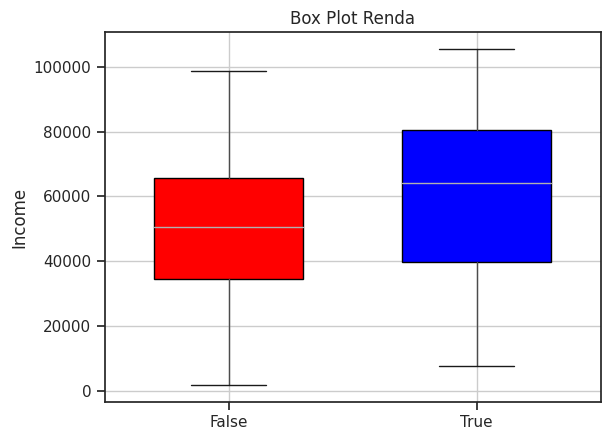

In [ ]:
fig, ax = plt.subplots()

df_marketing_copy[df_marketing_copy['Response'] == 0].boxplot(column='Income', ax=ax, positions=[0], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'))

df_marketing_copy[df_marketing_copy['Response'] == 1].boxplot(column='Income', ax=ax, positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'))

ax.set_xticks([0, 1])
ax.set_xticklabels([False, True])
ax.set_ylabel('Income')
ax.set_title('Box Plot Renda')

plt.show()

In [ ]:
print(df_marketing_copy.describe())

        Year_Birth    Education  Marital_Status         Income      Kidhome  \
count  2231.000000  2231.000000     2231.000000    2231.000000  2231.000000   
mean   1968.803227     2.390408        3.729269   51612.403317     0.444644   
std      11.982435     1.124324        1.076133   20564.364774     0.538605   
min    1893.000000     0.000000        0.000000    1730.000000     0.000000   
25%    1959.000000     2.000000        3.000000   35428.500000     0.000000   
50%    1970.000000     2.000000        4.000000   51563.000000     0.000000   
75%    1977.000000     3.000000        5.000000   68117.500000     1.000000   
max    1996.000000     4.000000        7.000000  105471.000000     2.000000   

          Teenhome      Recency     MntWines    MntFruits  MntMeatProducts  \
count  2231.000000  2231.000000  2231.000000  2231.000000      2231.000000   
mean      0.507396    49.129090   305.064097    26.391304       165.392201   
std       0.544696    28.946919   336.800944    39.827

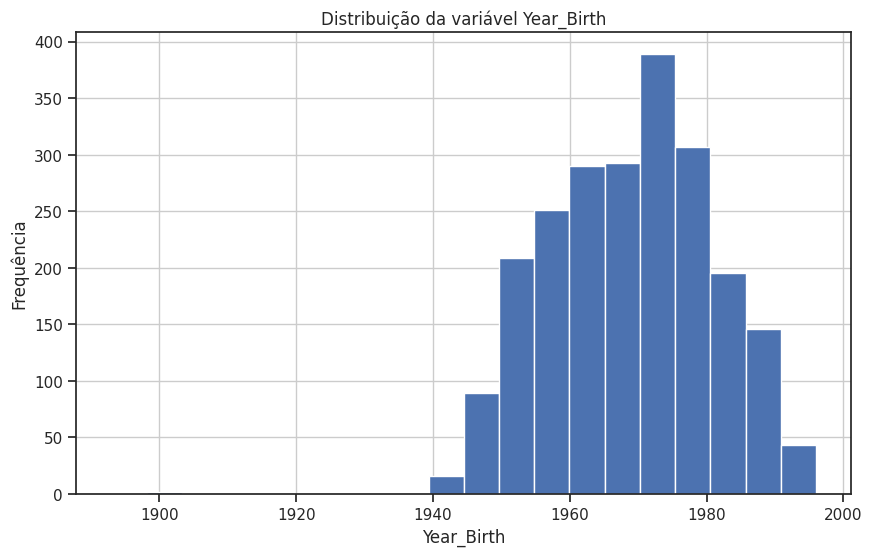

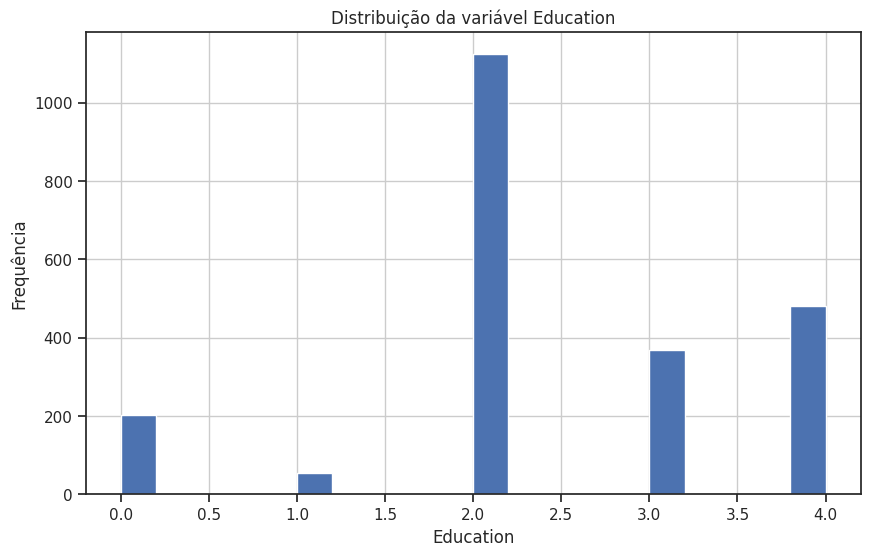

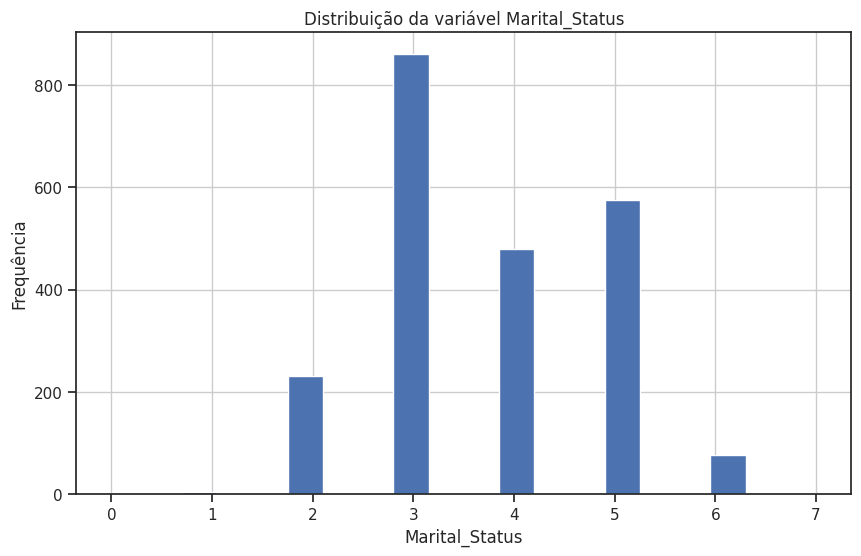

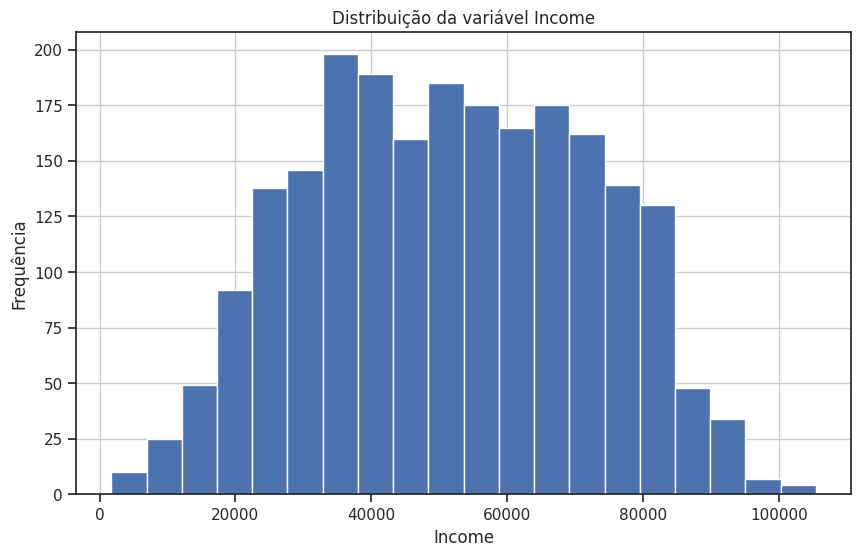

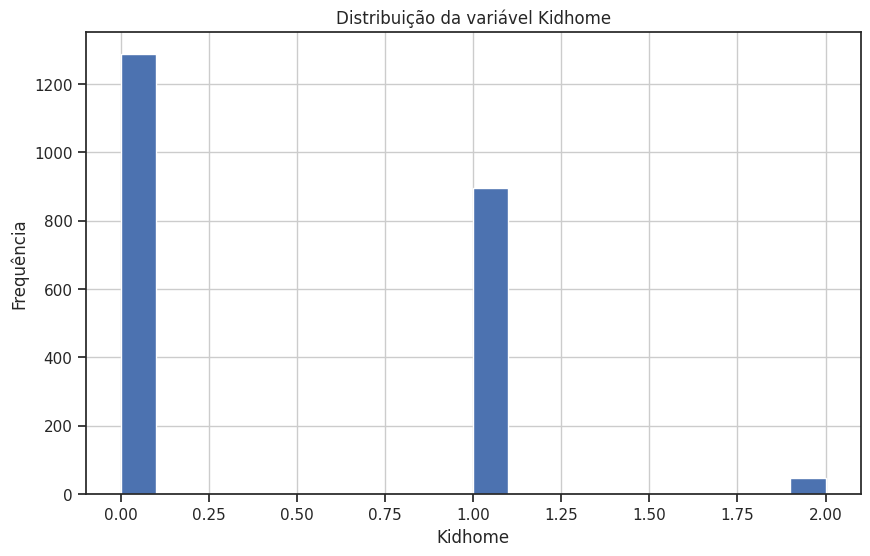

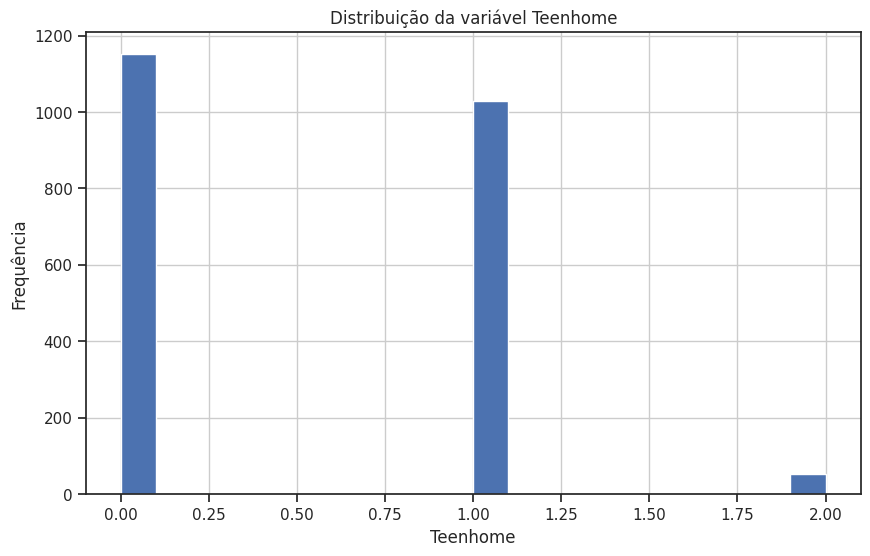

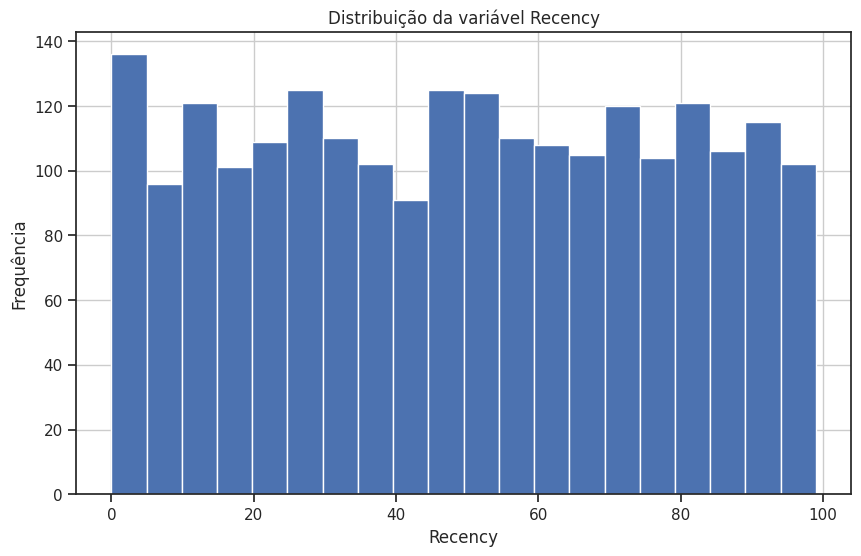

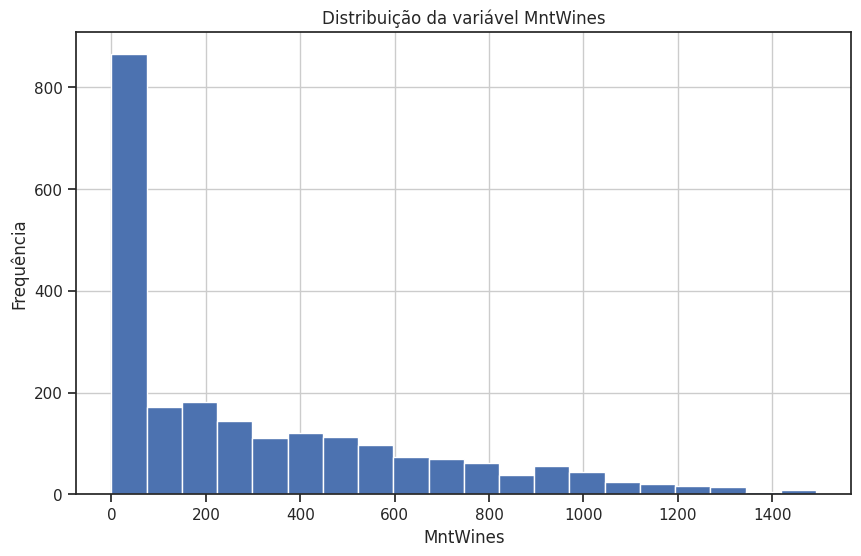

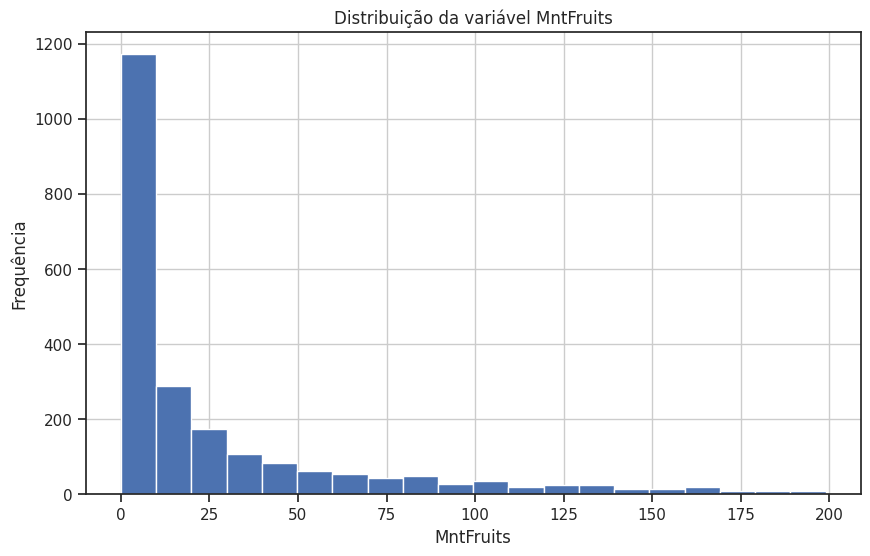

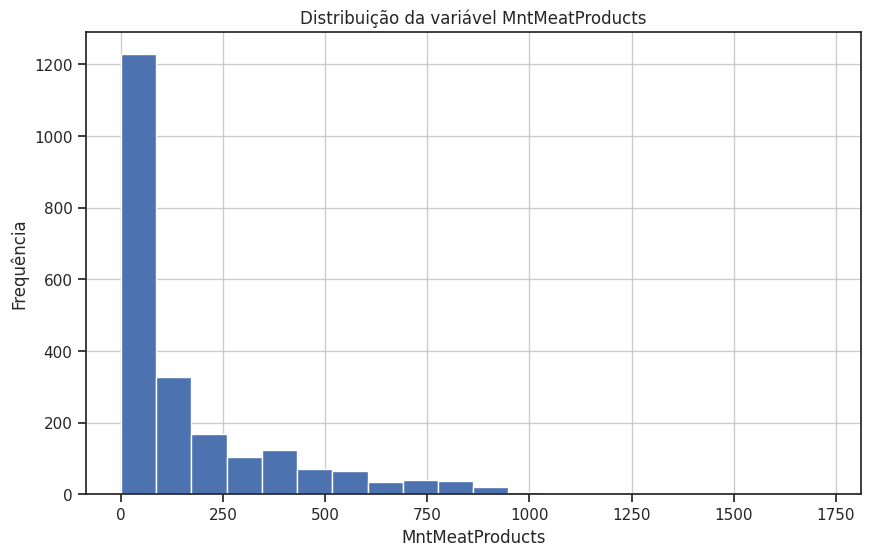

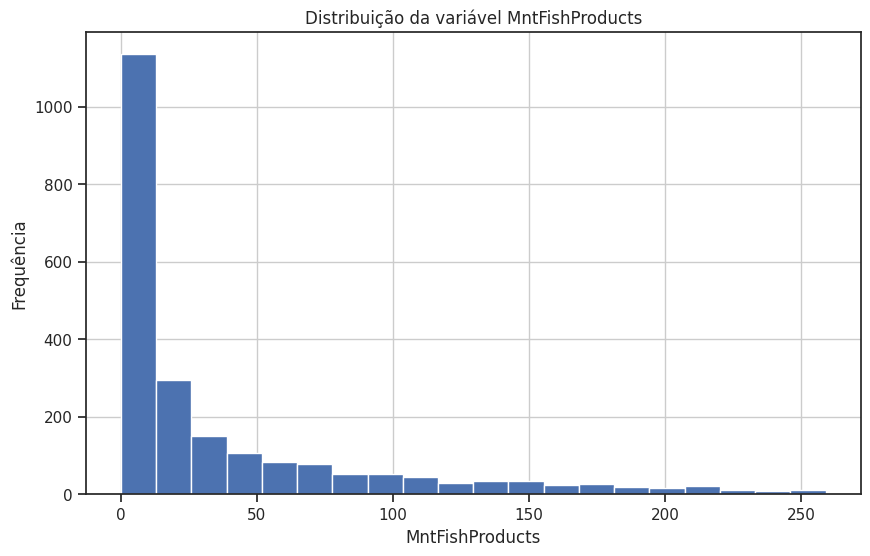

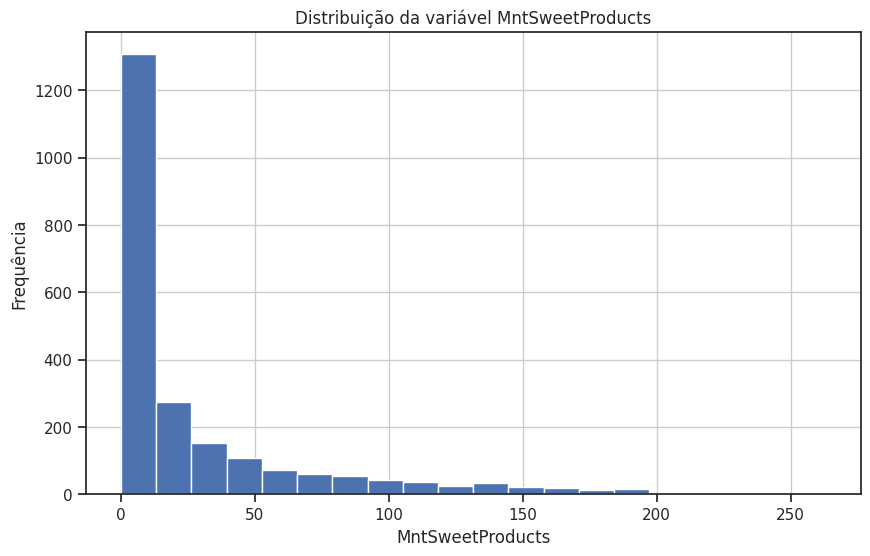

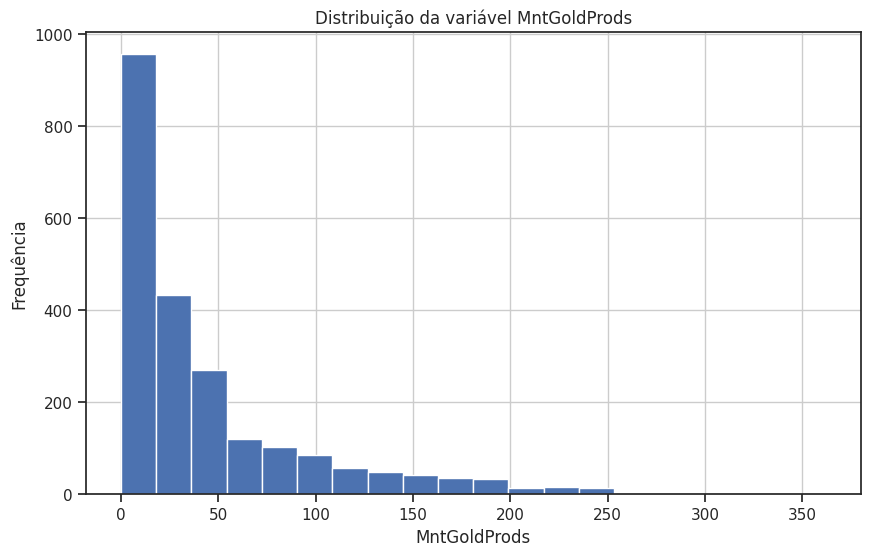

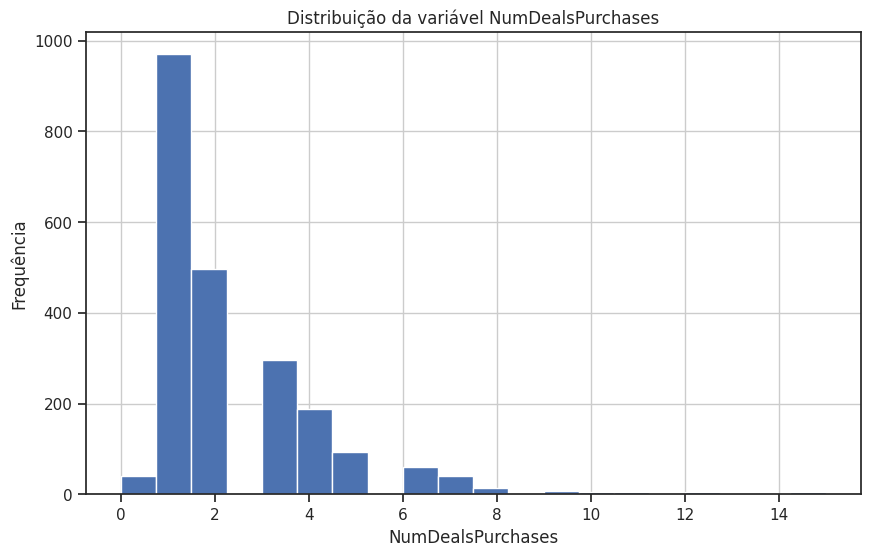

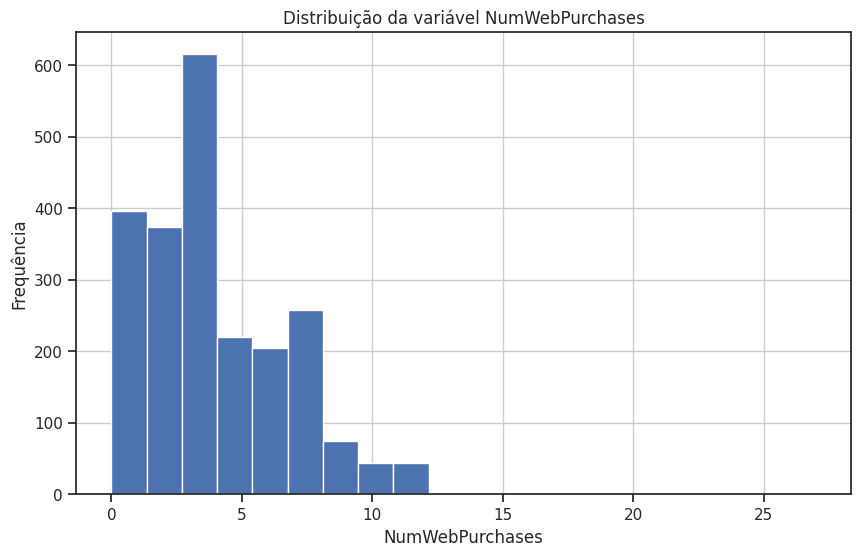

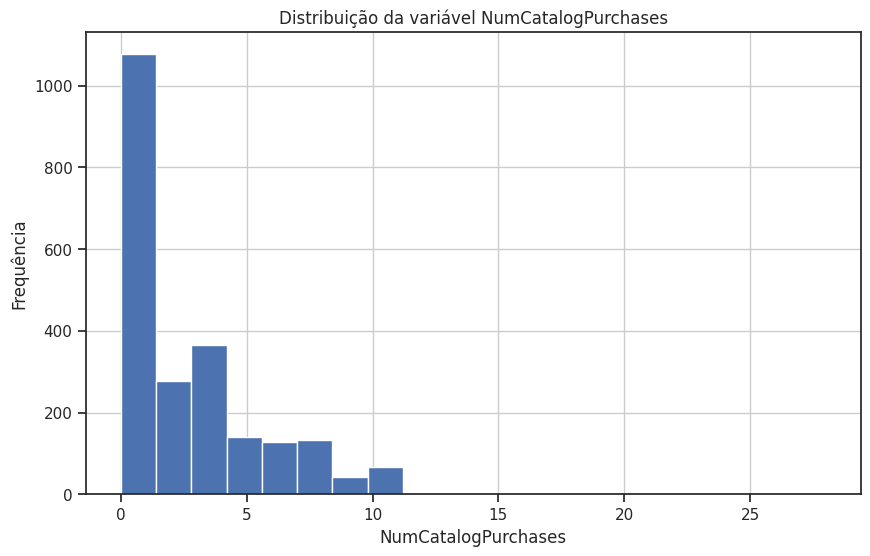

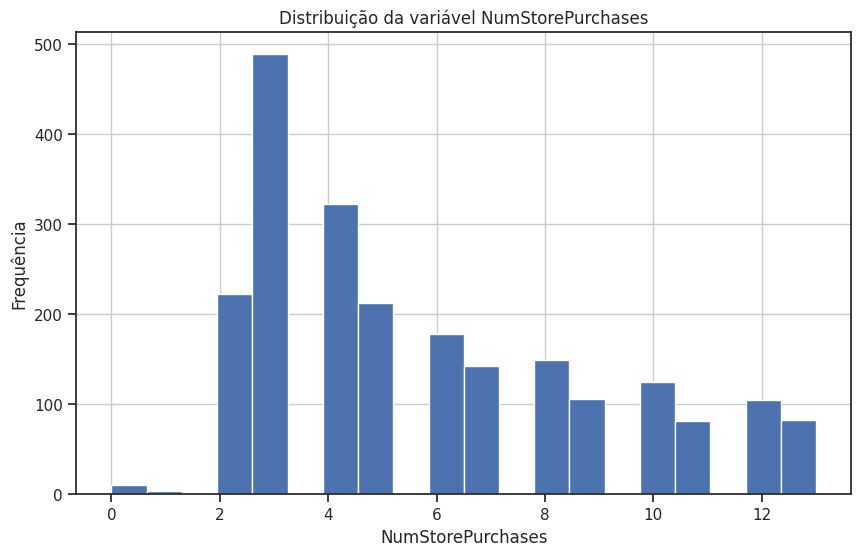

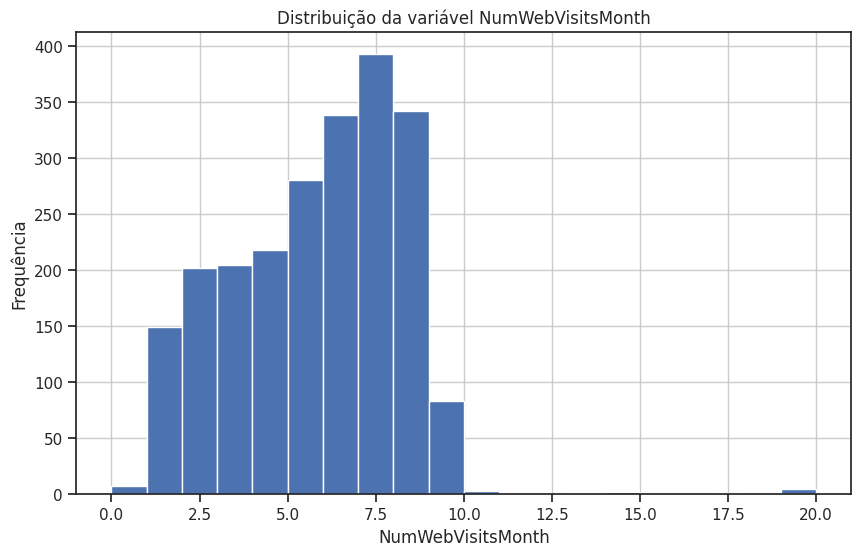

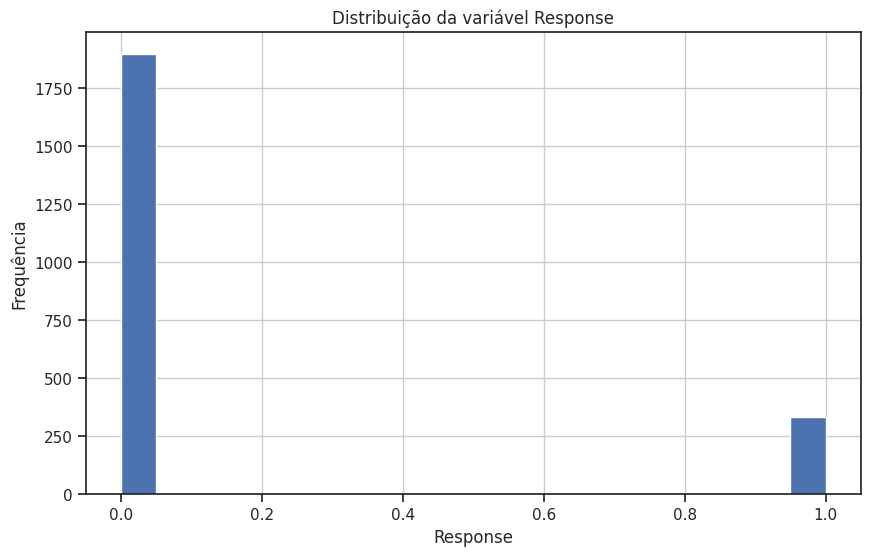

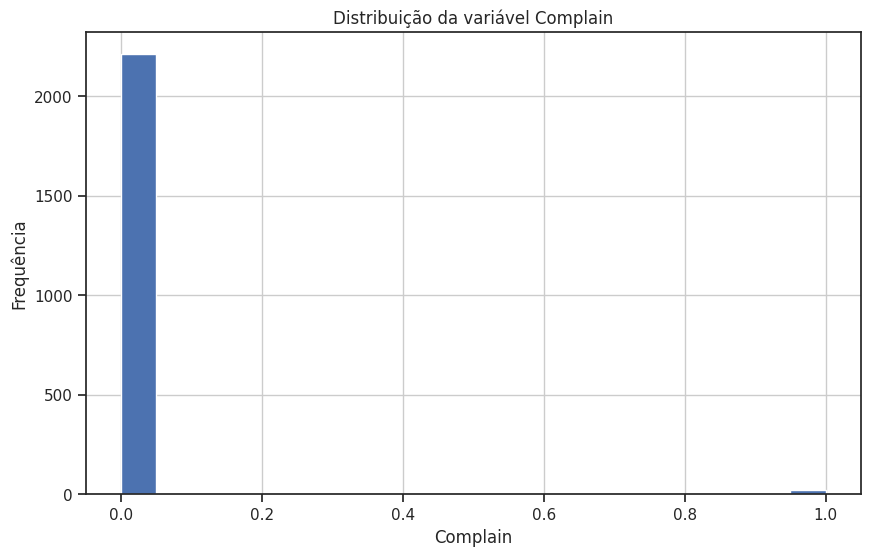

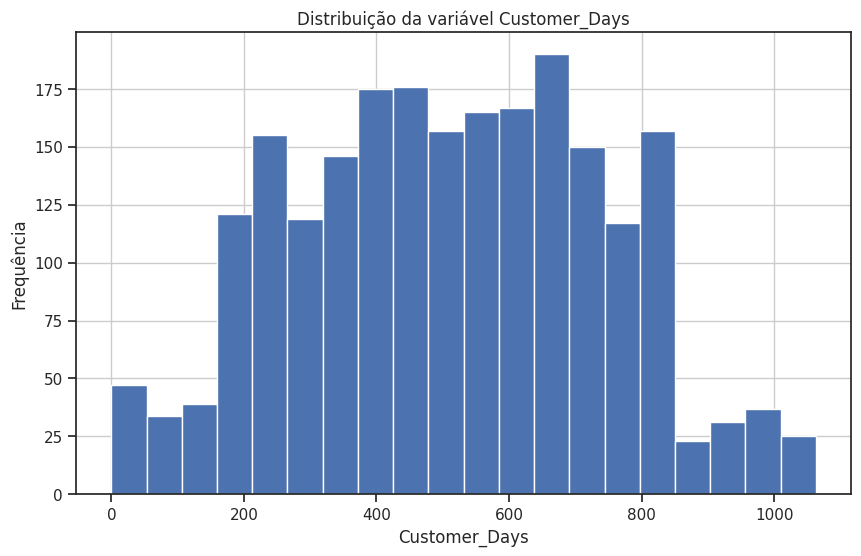

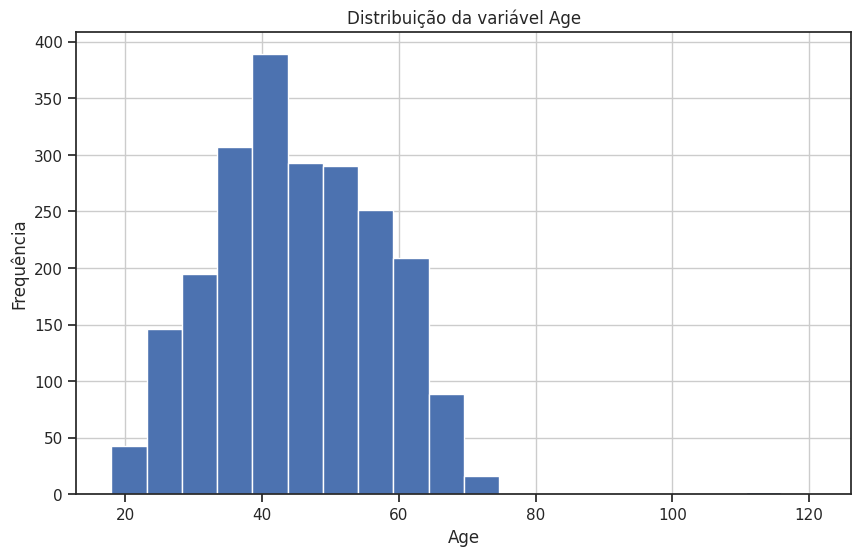

In [ ]:
for col in df_marketing_copy.select_dtypes(include=[float, int]):
    plt.figure(figsize=(10, 6))
    plt.hist(df_marketing_copy[col], bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.title(f'Distribuição da variável {col}')
    plt.grid()
    plt.show()

In [ ]:
#sns.set(style = 'ticks')
#sns.pairplot(df_marketing_copy, palette= ('r','b'), hue = 'Response')
#plt.show()

In [ ]:
media_income = df_marketing_copy['Income'].mean()
desvio_padrao_income = df_marketing_copy['Income'].std()
coef_variacao_income = (desvio_padrao_income / media_income) * 100
print(f"Coeficiente de Variação: {coef_variacao_income:.2f}%")

# Calcular o Desvio Absoluto Médio (Mean Absolute Deviation - MAD)
desvio_absoluto = abs(df_marketing_copy['Income'] - media_income)
mad = desvio_absoluto.mean()
print(f"Desvio Absoluto Médio (MAD): {mad:.2f}")

Coeficiente de Variação: 39.84%
Desvio Absoluto Médio (MAD): 17372.19


In [ ]:
df_marketing_copy['Education'].unique()

array([2, 4, 0, 3, 1])

In [ ]:
# mapeamento = {
#   'Basic': 1,
#   'Graduation': 2,
#   '2n Cycle': 3,
#   'Master': 4,
#   'PhD' : 5 }
# df_marketing_copy.loc[:, 'Education'] = df_marketing_copy['Education'].replace(mapeamento)

In [ ]:
df_marketing_copy['Marital_Status'].unique()

array([2, 4, 3, 5, 6, 7, 1, 0])

In [ ]:
# mapeamento = {
#    'Divorced': 1,
#   'Single': 2,
#   'Married': 3,
#   'Together': 4,
#  'Widow' : 5,
#   'YOLO': 6,
#   'Alone': 7,
#   'Absurd': 8 }
# df_marketing_copy.loc[:, 'Marital_Status'] = df_marketing_copy['Marital_Status'].replace(mapeamento)

In [ ]:
 df_marketing_alt2 = df_marketing_alt.drop('Response', axis=1)

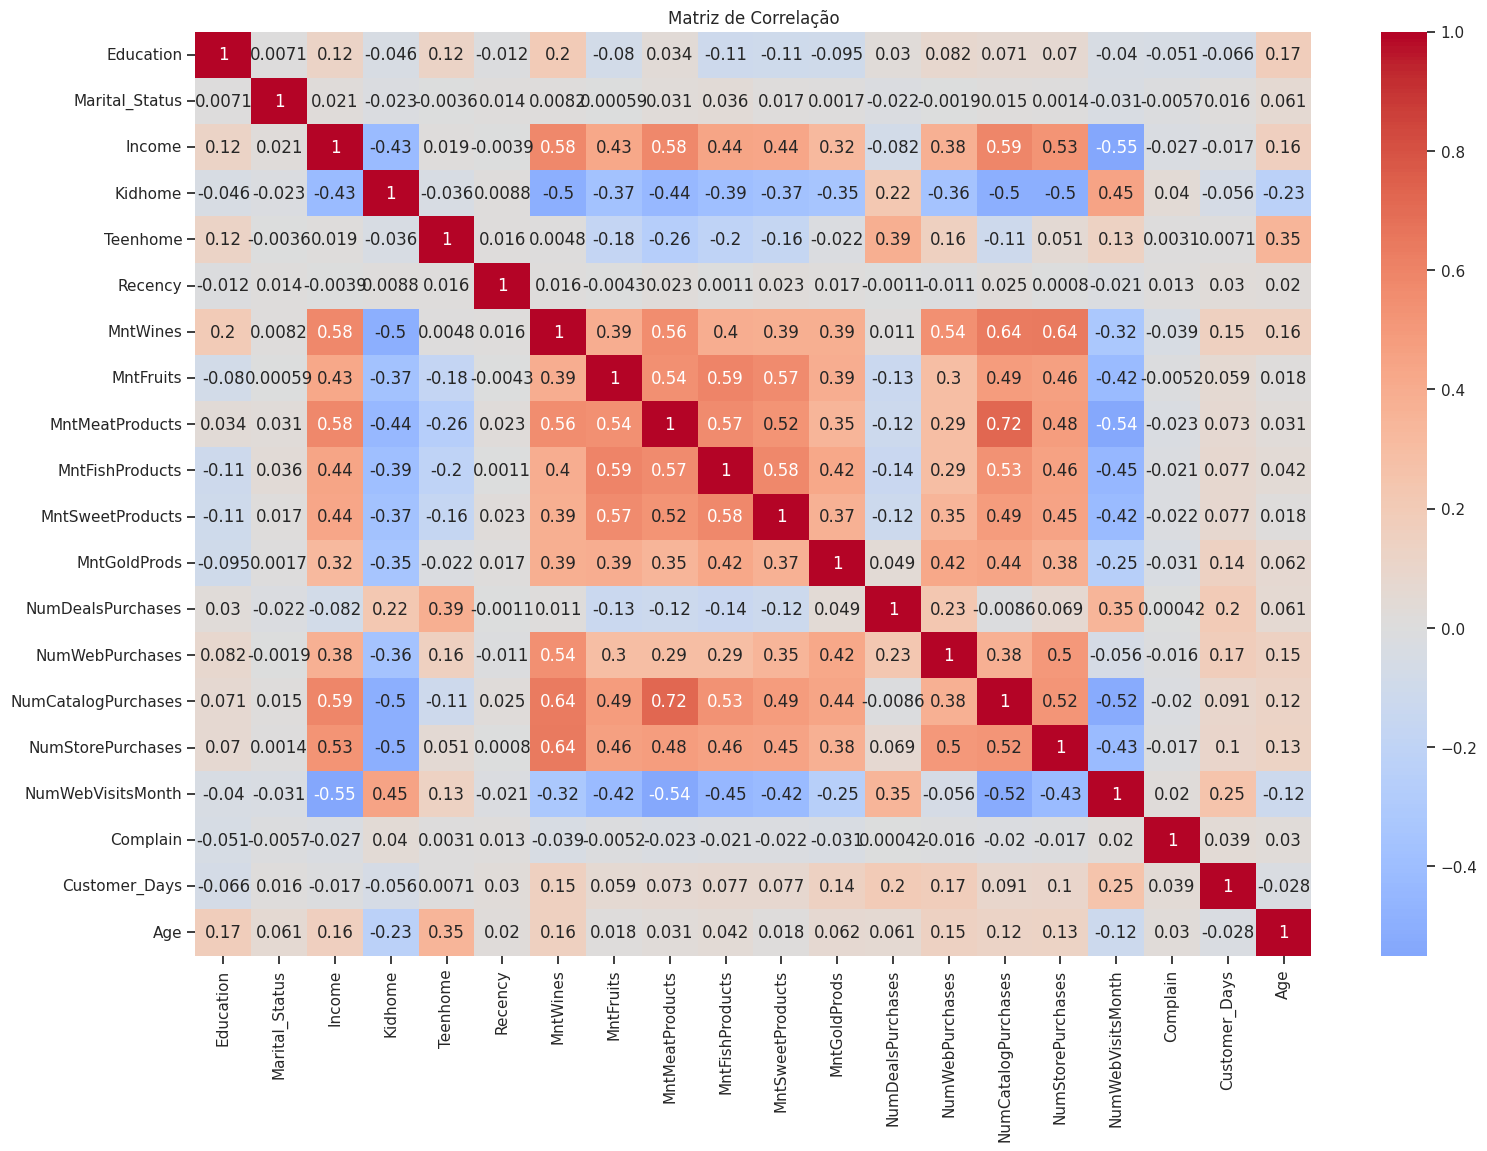

In [ ]:
correlation_matrix = df_marketing_alt2.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
df_marketing_alt2.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Customer_Days',
       'Age'],
      dtype='object')

**Variáveis com Potencial Preditor Significativo:**

Variáveis 'Income', 'NumWebPurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'NumDealsPurchases', dentre outras, podem ser relevantes para prever 'Response'`.




**Redundância de Features:**

Existem pares com altas correlações entre si:

('MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts') formam um grupo com correlações fortes, sugerindo que comprar um tipo de produto pode se relacionar com a compra dos outros.

('NumDealsPurchases', 'Teenhome') apresentam correlação considerável.



**Variáveis Categóricas:**

'Education' e 'Marital_Status', que foram codificadas com LabelEncoder, subestimam seu relacionamento com 'Response'.


In [ ]:
# df_marketing_copy['Target'] = df_marketing_copy.Response.map({0:0 , 1:1})

In [ ]:
y = df_marketing_alt.Response.copy()

X = df_marketing_alt.drop(['Response'], axis=1)


In [ ]:
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
y

0       1
1       1
2       0
3       0
4       1
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

In [ ]:
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_Days,Age
0,-0.350141,-1.607669,1.301833,-0.825218,-0.929894,-1.696001,-0.341540,1.953945,0.939667,1.345274,3.923722,3.335739,-0.685887,-0.030532,0.457817,0.064556,-1.779198,-0.097282,-1.460273,-0.099671
1,-0.350141,0.251004,0.193501,-0.825218,-0.929894,-1.696001,0.475643,-0.535709,-0.456207,-0.558902,-0.655733,-0.134633,-0.685887,1.049345,0.115638,0.372226,-0.130463,-0.097282,-1.455966,0.651494
2,-0.350141,-0.678332,0.600017,-0.825218,0.906934,-1.696001,-0.504976,-0.384821,-0.478364,-0.412427,-0.607273,-0.268846,-0.685887,-0.390491,-0.226541,-0.243114,-1.367014,-0.097282,-1.313834,0.901882
3,-0.350141,1.180340,-0.789912,1.032559,0.906934,-1.696001,-0.873451,-0.661449,-0.735382,-0.687068,-0.655733,-0.844046,-0.685887,-1.110409,-0.910898,-1.166125,0.693904,-0.097282,-2.071872,0.150717
4,-0.350141,0.251004,-1.229346,1.032559,-0.929894,-1.696001,-0.885337,-0.259081,-0.633461,-0.485665,-0.655733,-0.192153,-0.168236,-0.390491,-0.568720,-1.166125,0.693904,-0.097282,-1.671318,-1.685463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1.428354,-1.607669,0.568418,-0.825218,0.906934,1.722981,0.202258,-0.208785,-0.181464,0.173473,0.507303,0.651474,-0.168236,0.329427,-0.226541,1.602907,-0.542647,-0.097282,0.038577,-0.600447
2236,-2.128637,-0.678332,-0.846559,1.032559,-0.929894,1.722981,-0.888309,-0.409969,-0.682206,-0.632140,-0.461894,-0.537273,-0.685887,-1.110409,-0.910898,-0.858455,1.106087,-0.097282,0.736317,-0.683910
2237,-0.350141,-1.607669,-0.237184,1.032559,-0.929894,1.722981,-0.353426,-0.611153,-0.349855,-0.412427,-0.534583,-0.575619,-0.168236,0.689386,-0.568720,-0.243114,1.106087,-0.097282,2.097342,-0.600447
2238,-0.350141,-0.678332,0.542171,-0.825218,-0.929894,1.722981,-0.109757,0.294176,2.366561,2.041031,3.342204,0.363874,-0.685887,0.329427,0.457817,1.295237,-0.954831,-0.097282,0.968897,-0.767373


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1568, 20), (672, 20), (1568,), (672,))

In [ ]:
y_train.value_counts()

Response
0    1339
1     229
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

Response
0    567
1    105
Name: count, dtype: int64

In [ ]:
105/567

0.18518518518518517

In [ ]:
229/1339

0.17102315160567588

In [ ]:
model = RandomForestClassifier(max_depth=8, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=0)

In [ ]:
Finalmente = model.predict(X_test)

In [ ]:
Finalmente

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_test.values

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [ ]:
# from sklearn.svm import SVC


# modelo_svm = SVC()

# modelo_svm.fit(X_train, y_train)

# predições_svm = modelo_svm.predict(X_test)


In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# acuracia_svm = accuracy_score(y_test, predições_svm)
# precisao_svm = precision_score(y_test, predições_svm)
# recall_svm = recall_score(y_test, predições_svm)
# f1_svm = f1_score(y_test, predições_svm)



In [ ]:
cm = confusion_matrix(y_test, Finalmente, labels=model.classes_)
cm

array([[554,  13],
       [ 86,  19]])

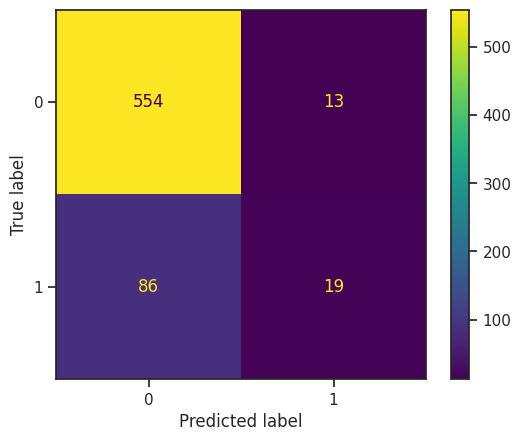

In [ ]:
cm = confusion_matrix(y_test, Finalmente, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Para nossa análise importa diminuir o falso negativo e aumentar o verdadeiro positivo. Ou seja, direcionar melhor a campanha de marketing. Então nossos resultados estão muito ruins.

In [ ]:
TP = 19
TN = 554
FP = 13
FN = 86

In [ ]:
acurácia = ((TP + TN) / (TP + TN + FP + FN)) * 100

precisao = (TP / (TP + FP)) * 100

recall = (TP / (TP + FN)) *100 # SENSIBILIDADE

F1 = 2 * ( (precisao * recall) / (precisao + recall) )


print(f'Acurácia = {acurácia} Precisão = {precisao} Recall = {recall} F1 = {F1} ' )

Acurácia = 85.26785714285714 Precisão = 59.375 Recall = 18.095238095238095 F1 = 27.73722627737226 


In [ ]:
print(classification_report(y_test,Finalmente))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       567
           1       0.59      0.18      0.28       105

    accuracy                           0.85       672
   macro avg       0.73      0.58      0.60       672
weighted avg       0.82      0.85      0.82       672



In [ ]:
model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X_train, y_train)

Agora_vai = model.predict(X_test)

In [ ]:
Agora_vai

array([0.19478277, 0.19767072, 0.07808602, 0.12586455, 0.07462185,
       0.07174274, 0.07345285, 0.19107232, 0.07808602, 0.07808602,
       0.19767072, 0.07174274, 0.07287226, 0.07619647, 0.07174274,
       0.07808602, 0.08626971, 0.47733182, 0.50928915, 0.47173542,
       0.07174274, 0.24614126, 0.29870612, 0.15431789, 0.07619647,
       0.07174274, 0.19350866, 0.1267052 , 0.07287226, 0.07174274,
       0.07287226, 0.18257287, 0.07287226, 0.10155692, 0.28618891,
       0.19942031, 0.07287226, 0.38417407, 0.28247897, 0.08974754,
       0.2716643 , 0.07808602, 0.1659768 , 0.12932051, 0.2861336 ,
       0.07174274, 0.123598  , 0.19514914, 0.20328629, 0.07506695,
       0.12783472, 0.25134759, 0.09570119, 0.07174274, 0.07979613,
       0.07287226, 0.23772582, 0.19283076, 0.08385447, 0.10155692,
       0.123598  , 0.19401962, 0.08406222, 0.30327683, 0.08210487,
       0.19767072, 0.07174274, 0.07174274, 0.07287226, 0.07462185,
       0.14902353, 0.07174274, 0.11249875, 0.07174274, 0.07287

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

Sera_agora = model.predict(X_test)

In [ ]:
Sera_agora

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

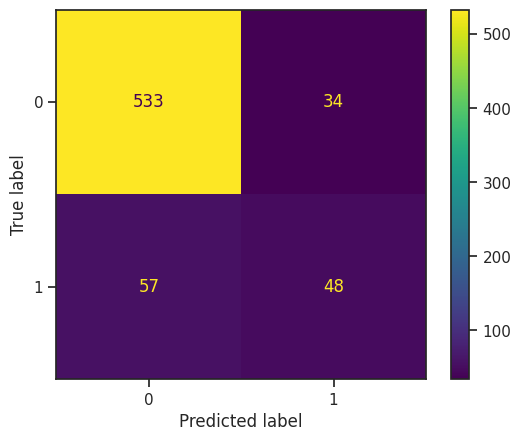

In [ ]:
cm = confusion_matrix(y_test, Sera_agora, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

**Esse aqui é o melhor**

In [ ]:
533 + 34 + 57 + 48

672

In [ ]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

acurácia = ((TP + TN) / (TP + TN + FP + FN)) * 100

precisao = (TP / (TP + FP)) * 100

recall = (TP / (TP + FN)) *100

F1 = 2 * ( (precisao * recall) / (precisao + recall) )

print(f'TP = {TP} , TN = {TN} , FP = {FP} , FN = {FN} ' )
print(f'Acurácia = {acurácia} , Precisão = {precisao} , Recall = {recall} , F1 = {F1} ' )

TP = 48 , TN = 533 , FP = 34 , FN = 57 
Acurácia = 86.45833333333334 , Precisão = 58.536585365853654 , Recall = 45.714285714285715 , F1 = 51.33689839572192 


In [ ]:

y = df_marketing_alt.Response.copy()

X = df_marketing_alt.drop(columns = ['Response','Education', 'Marital_Status', 'Recency', 'Complain'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

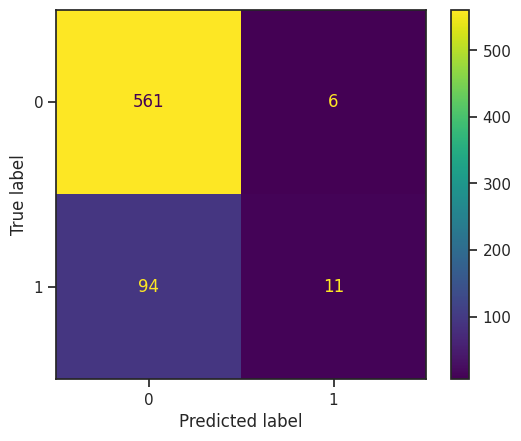

In [ ]:
model = RandomForestClassifier(max_depth=8, random_state=0)
model.fit(X_train, y_train)

Fé = model.predict(X_test)

cm = confusion_matrix(y_test, Fé, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()


In [ ]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

acurácia = ((TP + TN) / (TP + TN + FP + FN)) * 100

precisao = (TP / (TP + FP)) * 100

recall = (TP / (TP + FN)) *100

F1 = 2 * ( (precisao * recall) / (precisao + recall) )

print(f'TP = {TP} , TN = {TN} , FP = {FP} , FN = {FN} ' )
print(f'Acurácia = {acurácia} , Precisão = {precisao} , Recall = {recall} , F1 = {F1} ' )

TP = 11 , TN = 561 , FP = 6 , FN = 94 
Acurácia = 85.11904761904762 , Precisão = 64.70588235294117 , Recall = 10.476190476190476 , F1 = 18.0327868852459 


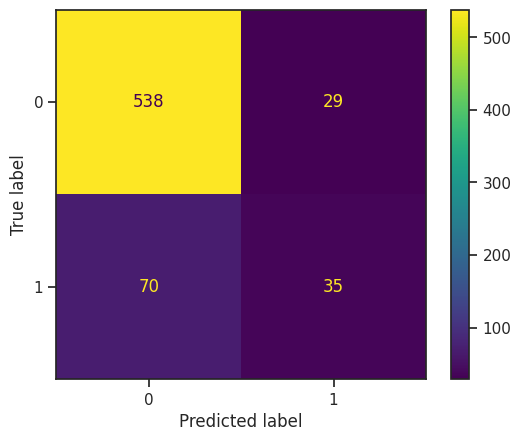

TP = 35 , TN = 538 , FP = 29 , FN = 70 
Acurácia = 85.26785714285714 , Precisão = 54.6875 , Recall = 33.33333333333333 , F1 = 41.42011834319526 


In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

Zero_Esperança = model.predict(X_test)

cm = confusion_matrix(y_test, Zero_Esperança, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

acurácia = ((TP + TN) / (TP + TN + FP + FN)) * 100

precisao = (TP / (TP + FP)) * 100

recall = (TP / (TP + FN)) *100

F1 = 2 * ( (precisao * recall) / (precisao + recall) )

print(f'TP = {TP} , TN = {TN} , FP = {FP} , FN = {FN} ' )
print(f'Acurácia = {acurácia} , Precisão = {precisao} , Recall = {recall} , F1 = {F1} ' )

Minha principal insatisfação está relacionada ao baixo recall, que indica que os modelos estão perdendo muitos clientes "Engajados" e não captando todo o potencial de engajamento.

O que teve maior recall foi o Sera_agora

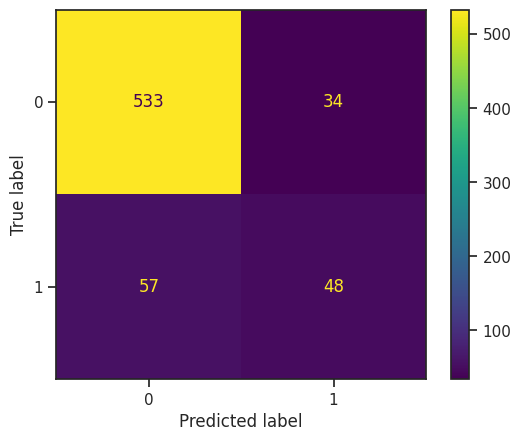

In [ ]:
cm = confusion_matrix(y_test, Sera_agora, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Acurácia = 86.45833333333334 , Precisão = 58.536585365853654 , Recall = 45.714285714285715 , F1 = 51.33689839572192

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 8],
    'random_state': [0, 10, 20]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, scoring='f1_macro', cv=5)

grid_search.fit(X_train, y_train)

melhor_parametro = grid_search.best_params_

melhor_modelo_rf = RandomForestClassifier(**melhor_parametro)
melhor_modelo_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=10)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 8],
    'learning_rate': [0.1, 0.05, 0.01]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, scoring='f1_macro', cv=5)

grid_search.fit(X_train, y_train)

melhor_parametro = grid_search.best_params_

melhor_modelo_xgb = XGBClassifier(**melhor_parametro)
melhor_modelo_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_rf = melhor_modelo_rf.predict(X_val)

accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)

print('Métricas Random Forest Otimizado:')
print(f'Acurácia: {accuracy_rf:.4f}')
print(f'Precisão: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1-score: {f1_rf:.4f}')

y_pred_xgb = melhor_modelo_xgb.predict(X_val)

accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
precision_xgb = precision_score(y_val, y_pred_xgb)
recall_xgb = recall_score(y_val, y_pred_xgb)
f1_xgb = f1_score(y_val, y_pred_xgb)

print('Métricas XGBoost Otimizado:')
print(f'Acurácia: {accuracy_xgb:.4f}')
print(f'Precisão: {precision_xgb:.4f}')
print(f'Recall: {recall_xgb:.4f}')
print(f'F1-score: {f1_xgb:.4f}')

Métricas Random Forest Otimizado:
Acurácia: 0.8482
Precisão: 0.5789
Recall: 0.1048
F1-score: 0.1774
Métricas XGBoost Otimizado:
Acurácia: 0.8408
Precisão: 0.4833
Recall: 0.2762
F1-score: 0.3515
